In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Exercício 1

Carregue o dataset contido no arquivo avocado-full.csv e, em seguida:

(a) Crie um gráfico de distribuição para avaliar os preços dos abacates do tipo convetional;

(b) Faça o mesmo solicitado no item (a), porém, dessa vez, considerando os abacates do tipo orgânico;

(c) Crie um gráfico de dispersão com regressão multilinear (lmplot) para avaliar a relação entre o preço médio e o volume total dos abacates. Considere apenas a região de Philadelphia e crie uma matiz (hue) baseada no tipo do abacate.

(d) Crie um mapa de calor (heatmap) da correlação dos dados contidos no dataset.

In [3]:
df = pd.read_csv('../data_sets/Avocado.csv')
df.head()

,Date,AveragePrice,Total Volume,year,region,type
0,2015-12-27,1.33,64236.62,2015,Albany,conventional
1,2015-12-20,1.35,54876.98,2015,Albany,conventional
2,2015-12-13,0.93,118220.22,2015,Albany,conventional
3,2015-12-06,1.08,78992.15,2015,Albany,conventional
4,2015-11-29,1.28,51039.60,2015,Albany,conventional


<AxesSubplot:xlabel='AveragePrice', ylabel='Count'>

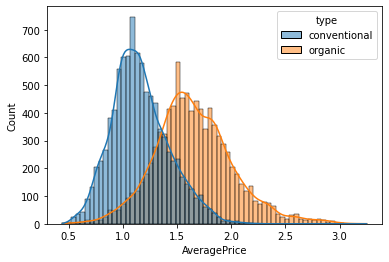

In [15]:
sns.histplot(data=df, x='AveragePrice', hue='type', kde=True)

c:\users\vinic\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

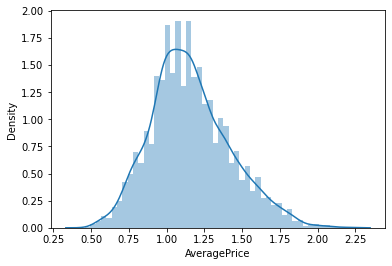

In [17]:
#a
sns.distplot(df[df['type'] == 'conventional']['AveragePrice'])

c:\users\vinic\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

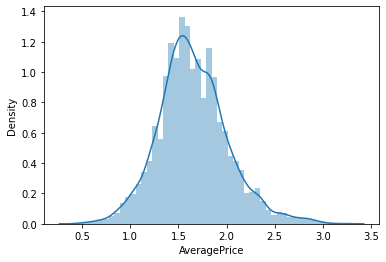

In [18]:
#b
sns.distplot(df[df['type'] == 'organic']['AveragePrice'])

Crie um gráfico de dispersão com regressão multilinear (lmplot) para avaliar a relação entre o preço médio e o volume total dos abacates. Considere apenas a região de Philadelphia e crie uma matiz (hue) baseada no tipo do abacate.

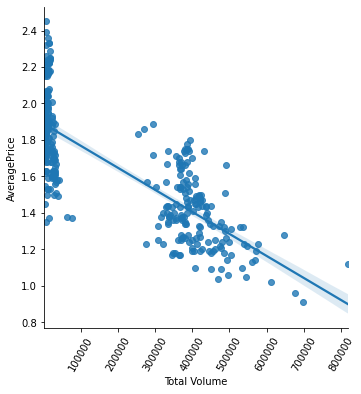

In [23]:
#c
sns.lmplot(data=df[df['region'] == 'Philadelphia'], x='Total Volume', y='AveragePrice')
plt.xticks(rotation=60)
plt.show()

<AxesSubplot:>

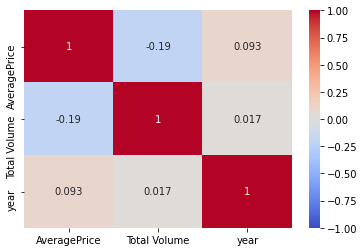

In [29]:
#d
sns.heatmap(df.corr(), cmap='coolwarm', vmin=-1, vmax=1, annot=True)

## Exercício 2

Carregue o dataset contido no arquivo cholera-dataset.csv e, em seguida, obtenha:

(a) Um dataset que contenha apenas os dados dos países que fazem parte do Sudeste da Ásia.

(b) Agrupe os dados do dataset obtido no item anterior, somando os valores agrupados.

(c) Crie um gráfico de dispersão (utilizando o seaborn) para visualizar uma relação entre o número de casos reportados de cólera nesses países e o número de mortes reportadas pela cólera.

(d) Crie um gráfico de distribuição para verificar o número de casos reportados de cólera nos países que estão nessa região (Sudeste da Ásia).

(e) Utilize o pairplot para visualizar a relação entre todos os dados (colunas) contidos no dataset, considerando apenas os países do sudeste da Ásia.

In [5]:
df = pd.read_csv('../data_sets/cholera-dataset.csv')
df.head()

,Country,Year,Number of reported cases of cholera,Number of reported deaths from cholera,Cholera case fatality rate,WHO Region
0,Afghanistan,2016,677.0,5.0,0.70,Eastern Mediterranean
1,Afghanistan,2015,58064.0,8.0,0.01,Eastern Mediterranean
2,Afghanistan,2014,45481.0,4.0,0.00,Eastern Mediterranean
3,Afghanistan,2013,3957.0,14.0,0.35,Eastern Mediterranean
4,Afghanistan,2012,12.0,0.0,0.10,Eastern Mediterranean


In [42]:
df['WHO Region'].unique()

array(['Eastern Mediterranean', 'Europe', 'Africa', 'Americas',
       'Western Pacific', 'South-East Asia'], dtype=object)

In [50]:
#a
sudeste_asia = df[df['WHO Region'] == 'South-East Asia']

In [45]:
#b
sudeste_asia.groupby('Country').sum()

,Year,Number of reported cases of cholera,Number of reported deaths from cholera,Cholera case fatality rate
Country,,,,
Bangladesh,86844,294647.0,137429.0,1201.33
Bhutan,7976,960.0,25.0,5.71
India,118965,1293054.0,509438.0,969.51
Indonesia,77237,394945.0,30600.0,354.84
Maldives,1978,11336.0,220.0,1.94
Myanmar,84920,38431.0,10394.0,788.98
Nepal,67550,67999.0,1934.0,92.77
Sri Lanka,39718,10461.0,598.0,86.41
Thailand,77382,55982.0,2969.0,122.92


<AxesSubplot:xlabel='Number of reported cases of cholera', ylabel='Number of reported deaths from cholera'>

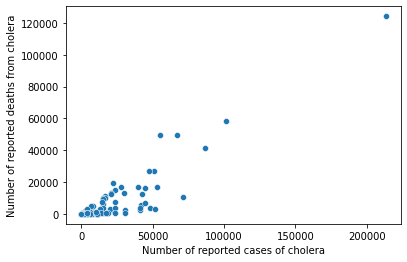

In [48]:
#c
sns.scatterplot(data=sudeste_asia, x='Number of reported cases of cholera', y='Number of reported deaths from cholera')

c:\users\vinic\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Number of reported cases of cholera', ylabel='Density'>

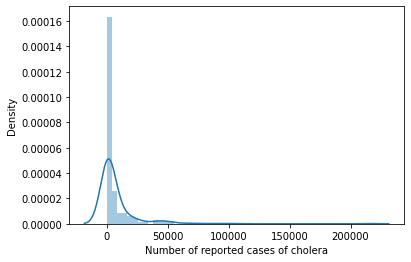

In [57]:
#d
sns.distplot(sudeste_asia['Number of reported cases of cholera'])

<AxesSubplot:xlabel='Number of reported cases of cholera', ylabel='Count'>

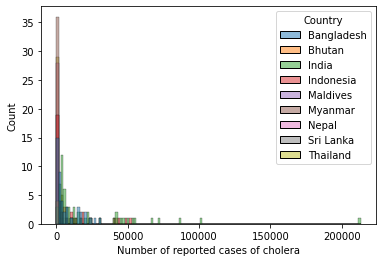

In [58]:
sns.histplot(data=sudeste_asia, x='Number of reported cases of cholera', hue='Country')

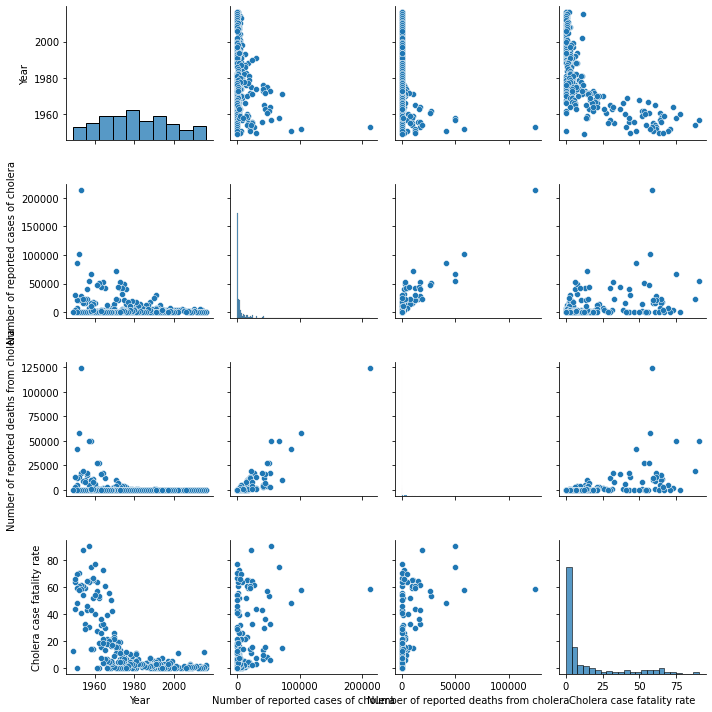

In [80]:
#e
sns.pairplot(sudeste_asia)
plt.tight_layout()

## Exercício 3
O arquivo heart-attack-possibility.csv consiste em um dataset que contém dados sobre pessoas que possuem uma alta probabilidade de apresentar um ataque cardíaco (target=1) ou apresentam uma baixa probabilidade quanto a isso (target=0). Além dessa informação da probabilidade de apresentar um ataque cardíaco, o dataset também dispõe de outras informações sobre os indivíduos, tais como a idade, o sexo, bem como outros dados médicos.

Carregue o dataset supracitado e, em seguida:

(a) Crie um gráfico de distribuição para avaliar a idade das pessoas cujas informações estão contidas no dataset.

(b) Crie um grafico de contagem (countplot) que avalie a quantidade de pessoas com alta probabilidade e baixa probabilidade de desenvolver um ataque cardíaco, separando-os com um matriz baseada no sexo.

(c) Utilize o pairplot para visualizar a relação entre todos os dados (colunas) contidos no dataset.

(d) Crie um gráfico de dispersão para analisar a relação entre os dados das colunas tresbps e target, utilizando uma matiz (hue) baseado no próprio target. (e) Construa um gráfico de dispersão e 
distribuição (jointplot) que avalie a relação entre as colunas age e thalach.

In [6]:
df = pd.read_csv('../data_sets/heart.csv')
df.head()
'''
0 - Female
1 - Male
'''

'\n0 - Female\n1 - Male\n'

In [93]:
df['trestbps'].unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164], dtype=int64)

<AxesSubplot:xlabel='age', ylabel='Count'>

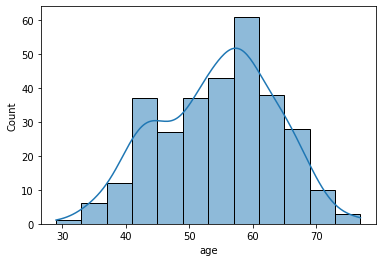

In [73]:
#a
sns.histplot(data=df, x='age', kde=True)

<AxesSubplot:xlabel='target', ylabel='count'>

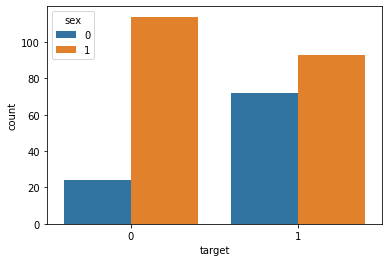

In [77]:
#b
sns.countplot(data=df, x='target', hue='sex')

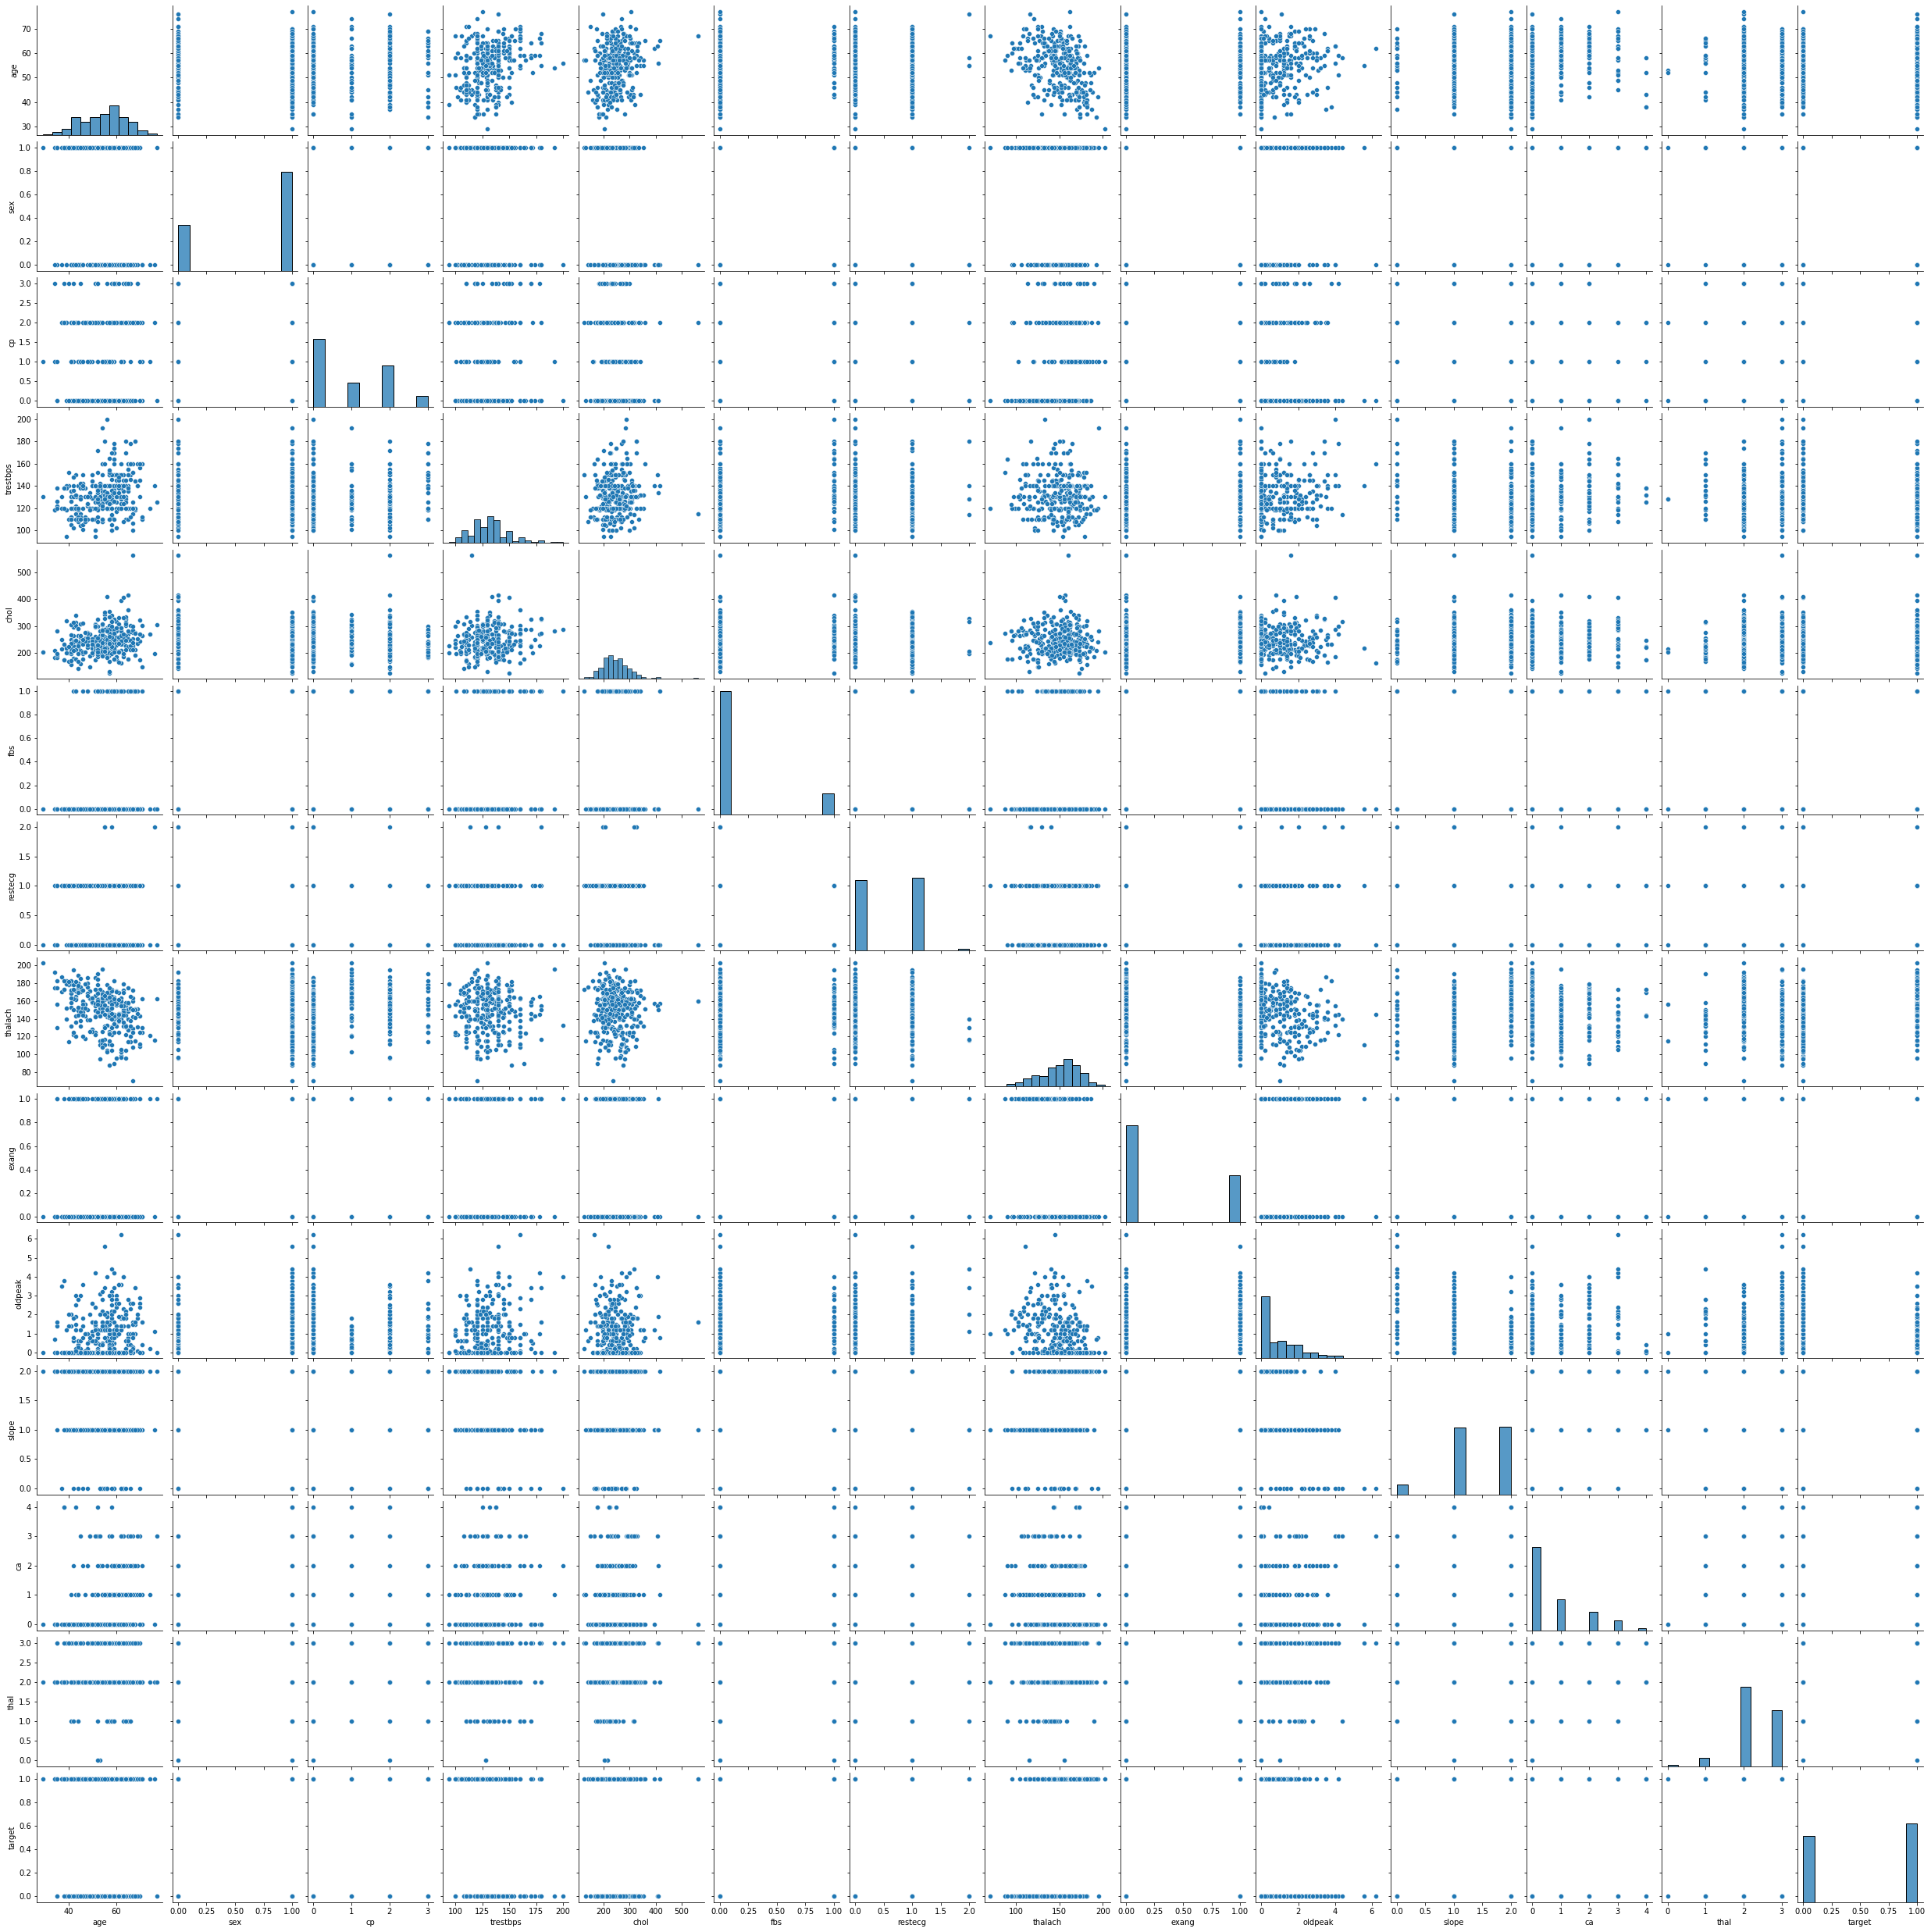

In [81]:
#c
sns.pairplot(df)

<AxesSubplot:xlabel='target', ylabel='trestbps'>

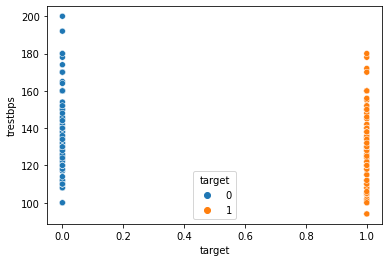

In [92]:
#d
sns.scatterplot(data=df, x='target', y='trestbps', hue='target')

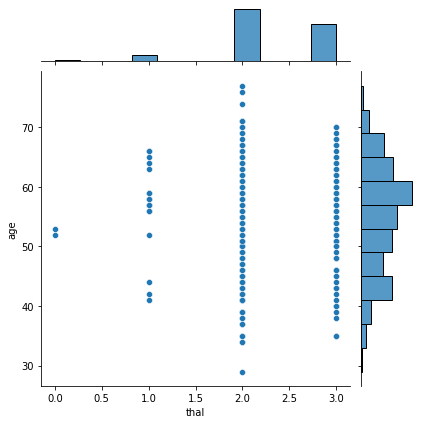

In [95]:
#e
sns.jointplot(data=df, x='thal', y='age')

## Exercício 4

O arquivo diabetes.csv (clique aqui para fazer o download) consiste em um dataset com a informação de que o paciente tem diabetes (Outcome=1) ou não (Outcome=0). Em particular, todos os pacientes deste dataset são mulheres com pelo menos 21 anos de herança indígena Pima. Além disso, o dataset apresenta outras informações sobre essas mulheres, como a quantidade de vezes que engravidou, concentração de glicose plasmática, pressão sanguínea, IMC, idade, dentre outros.

Carregue esses dados em um DataFrame e, em seguida:

(a) Plote um gráfico de distribuição da idade das mulheres que têm diabetes. Faça o mesmo para as mulheres que não têm.

(b) Crie um gráfico de barras (barplot) cujo eixo horizontal seja formado pelo número de gravidezes e o eixo vertical formado pela informação de diabetes (Outcome).

(c) Utilize o pairplot para visualizar a relação entre todos os dados (colunas) contidos no dataset.

(d) Construa um gráfico de dispersão com regressão multilinear (lmplot) para avaliar a relação entre as colunas SkinThickness e BMI, utilizando uma matiz (hue) baseada na coluna Outcome.

In [100]:
df = pd.read_csv('../data_sets/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<AxesSubplot:xlabel='Age', ylabel='Count'>

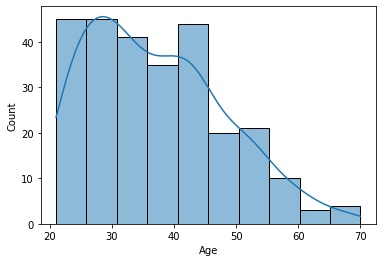

In [102]:
#a
sns.histplot(data=df[df['Outcome'] == 1], x='Age', kde=True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

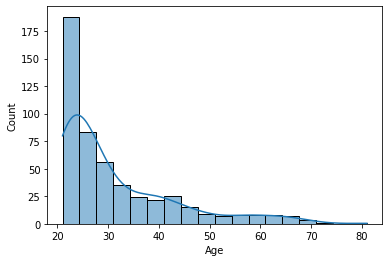

In [103]:
sns.histplot(data=df[df['Outcome'] == 0], x='Age', kde=True)

<AxesSubplot:xlabel='Pregnancies', ylabel='Outcome'>

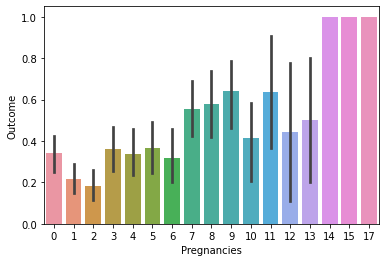

In [105]:
#b
sns.barplot(data=df, x='Pregnancies', y='Outcome')

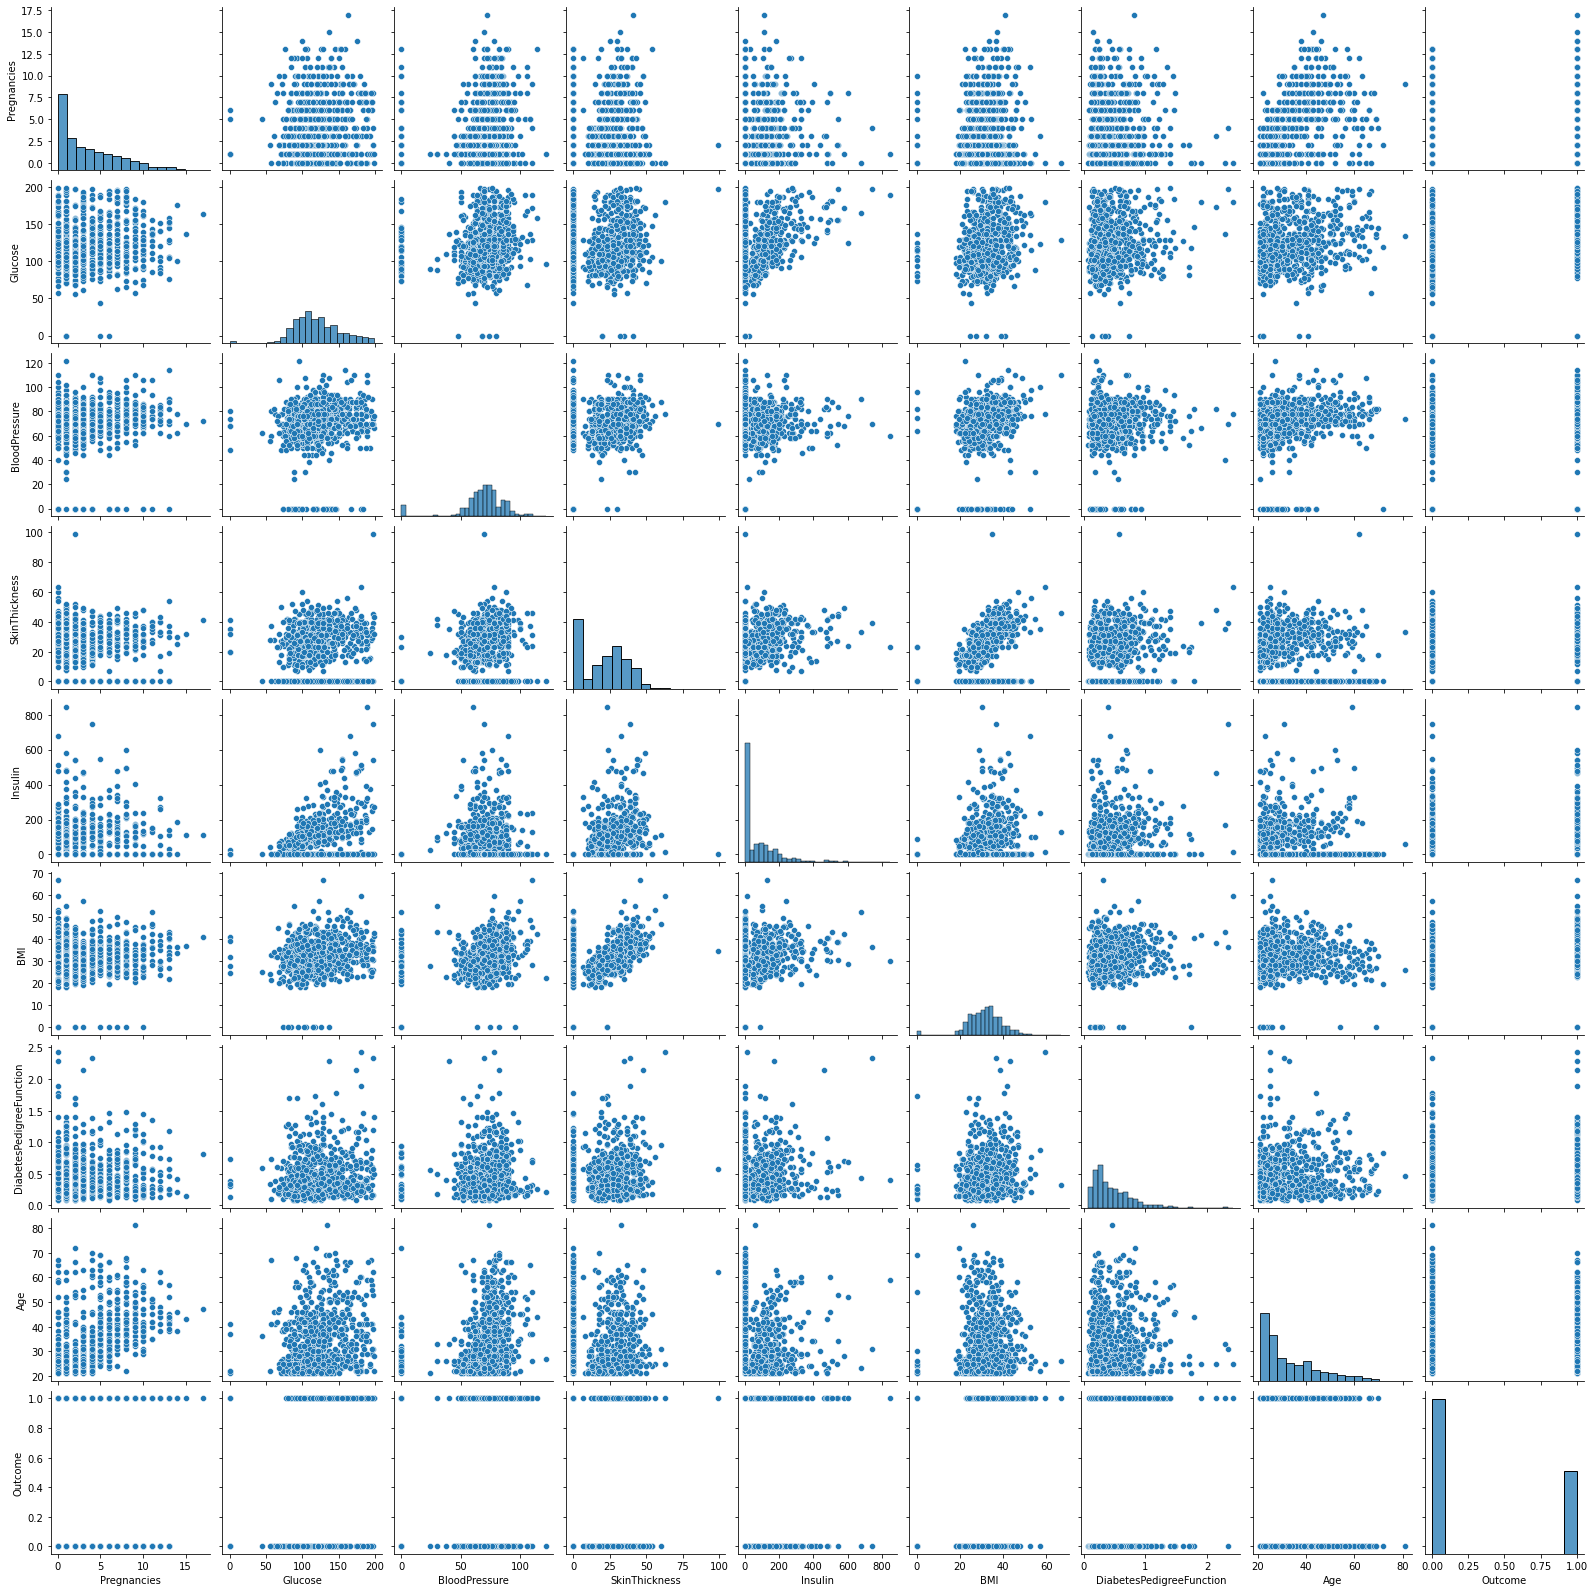

In [106]:
#c
sns.pairplot(df)

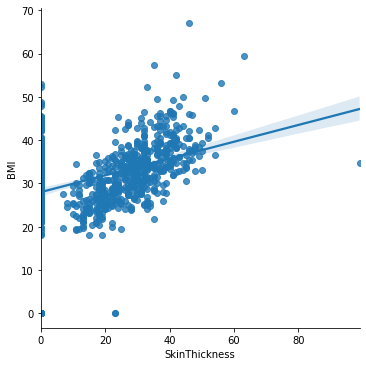

In [109]:
#d
sns.lmplot(data=df, x='SkinThickness', y='BMI')